                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.016567        0.220173
tenure               0.016567  1.000000        0.247900
MonthlyCharges       0.220173  0.247900        1.000000
73.4630129206304 % of customer were retained
26.536987079369588 % of customers churned
                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001874 -0.001808    0.010517  0.005106   
SeniorCitizen    -0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner          -0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents        0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService     -0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines    -0.006739       0.146185  0.142410   -0.024991  0.343032   
InternetService  -0.000863      -0.032310  0.000891    0.044590 -0.030359

KeyError: ('tenure', 'gender', 'MonthlyCharges')

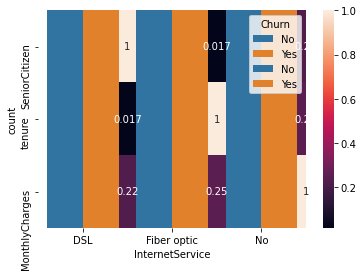

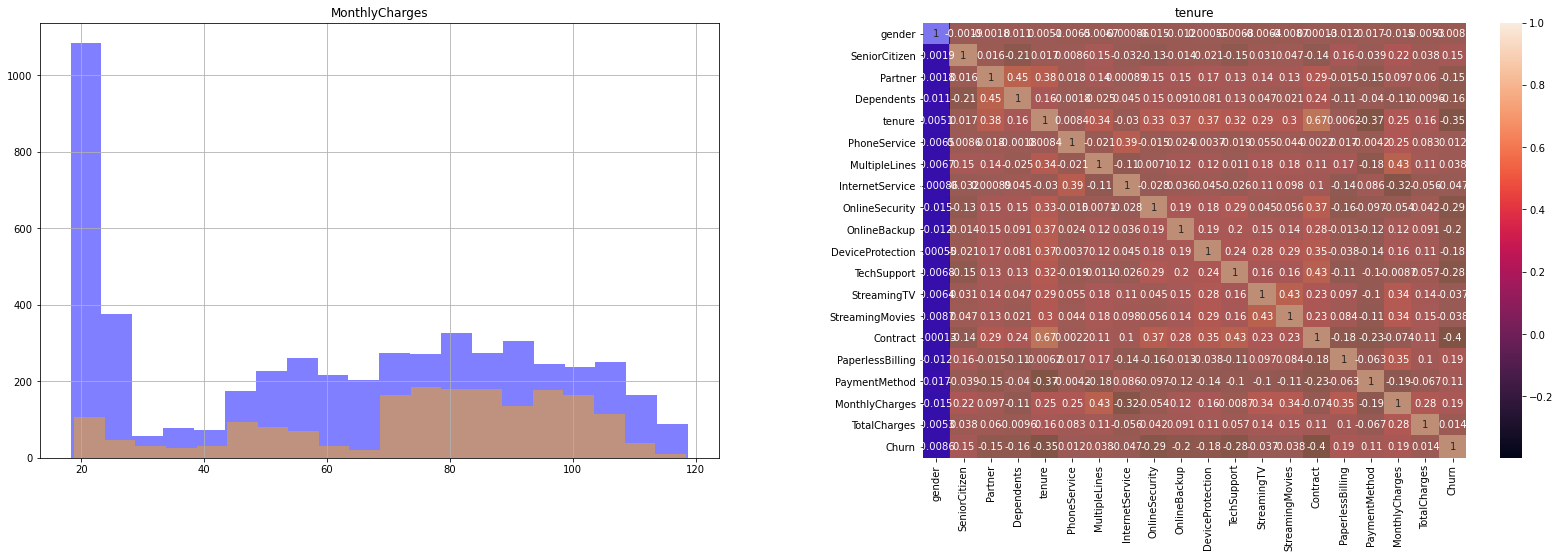

In [23]:
#import all relevant libraries 
import numpy as np 
import pandas as pd 
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
#import dataset
dataset= pd.read_csv("/Users/Jako/Downloads/Telco-Customer-Churn.csv")

dataset.head()
dataset.columns.values #Listing all the cols
dataset.isna().sum() #checking for missing data in each of the columns 
dataset.describe() #Giving key stats of the data which have numeric value\

#correlation matrix

corrmatrix=dataset.corr()
print(corrmatrix)
sns.heatmap(corrmatrix,annot=True)



#Calculating the total customer churn and visualizing it 
dataset['Churn'].value_counts() #Total Number of customer that have churned and not churned 
sns.countplot(dataset['Churn']) #Plotting the churn distribution

#Calucating the percentage of customers retained and chruning 
retained=dataset[dataset.Churn=='No']
churned=dataset[dataset.Churn=='Yes']
num_retain=retained.shape[0]
num_churn=churned.shape[0]

#Print percentage of customers that stayed 
print(num_retain/(num_retain+num_churn)*100,"% of customer were retained")

#Print percentage of customers churned 
print(num_churn/(num_retain+num_churn)*100,"% of customers churned")

#Visualizing the churn count categorized by gender 
sns.countplot(x='gender', hue='Churn',data=dataset)

#Visualizing the churn count categorized by internet service to determine which category is facing max churn
sns.countplot(x='InternetService', hue='Churn',data=dataset)

#Visualizing relationship between tenure, monthly charges and customer churn 
numerical_features=['tenure','MonthlyCharges']
fig,ax=plt.subplots(1,2,figsize=(28,8))
dataset[dataset.Churn=='No'][numerical_features].hist(bins=20,color="blue",alpha=0.5,ax=ax)
dataset[dataset.Churn=='Yes'][numerical_features].hist(bins=20,color="orange",alpha=0.5,ax=ax)


#Data Processing and cleaning 

#removing unnecessary column customerID
clean_df=dataset=dataset.drop('customerID',axis=1)
clean_df.shape

#Converting all non-numeric columns to numerical data types 
for col in clean_df.columns:
    if clean_df[col].dtype==np.number: #checking if the column is number type or not 
        continue 
    clean_df[col]=LabelEncoder().fit_transform(clean_df[col]) #converting non-numeric type columns to numeric

#Now check if the new dataset columns has converted to numeric
clean_df.dtypes

#correlation matrix

cmatrix=clean_df.corr()
print(cmatrix)
sns.heatmap(cmatrix,annot=True)


#Scaling the cleaned data for values to be between 0 and 1 to make classification easy\
X=clean_df.drop('Churn',axis=1)
y=clean_df['Churn']

#Standardizing/scaling the features 
X=StandardScaler().fit_transform(X)

#Spliting data into 80% training and 20% testing 
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

#Creating the model (as we are doing binary classification, we are using logistic regression)
model=LogisticRegression()

#Training the model
model.fit(x_train,y_train)


#Evaluting the model 
prediction=model.predict(x_test)
print(prediction)

#Checking precision, recall, f1-score
print(classification_report(y_test,prediction))





